# Clean up and Visualization Alaska Lightning Detection Network Data

Here we read, parse, convert the data into georeferenced, and produce visualizations.

In [52]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#from matplotlib_scalebar.scalebar import ScaleBar

ModuleNotFoundError: No module named 'matplotlib_scalebar'

In [34]:
epoch1_lightning_filename = '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/Alaska_Historical_Lightning/Historical_Lightning_1986_2012_ImpactSystem_AlaskaAlbersNAD83.txt'
epoch2_lightning_filename = '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/Alaska_Historical_Lightning/Historical_Lightning_2012_2022_TOA_AlaskaAlbersNAD83.txt'
tundra_shapefile = '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/Geometries/Alaskan_Tundra/Alaska_tundra_merged.shp'

Read in the tundra shapefile to use for visualizations.

In [35]:
tundra_shape = gpd.read_file(tundra_shapefile)
tundra_shape.head(1)

,AREA,PERIMETER,ALASKA3_,ALASKA3_ID,ILUM,ZONE_,PERCENTLAK,CALCAREOUS,SOIL,BEDROCK,...,LAKEPIXCAT,COUNTRY,LANDSCAPE,PHYSIOG,FINAL,VEG,COMM,Shape_Leng,Shape_Area,geometry
0,56720400.0,34777.1,2,3379,200,4,3,0,71,50,...,3,7,4,13,10,13.01,W2.2,34901.097484,5.713710e+07,"MULTIPOLYGON (((-388058.140 992814.890, -39036..."


## Read and Georeference Lightning Data

In [36]:
epoch1_lightning_df = pd.read_csv(epoch1_lightning_filename)
epoch1_lightning_df.head(3)

,OBJECTID,LOCALDATET,STRIKETIME,LAT,LON,SIGNALSTRE,MULTIPLICI
0,1,5/26/1986 00:00:00,1986/05/26 12:53,62.466000,-140.715,-152.100006,1
1,2,5/30/1986 00:00:00,1986/05/30 15:14,64.081001,-159.418,-41.599998,2
2,3,6/17/1986 00:00:00,1986/06/17 00:39,61.160999,-160.946,-54.900002,1


In [37]:
epoch2_lightning_df = pd.read_csv(epoch2_lightning_filename)
epoch2_lightning_df.head(3)

,OID_,STROKETYPE,NETWORKCODE,UTCDATETIME,LOCALDATETIME,MILLISECONDS,LATITUDE,LONGITUDE,AMPLITUDE,GDOP,ERRSEMIMAJOR,ERRSEMIMINOR,ERRELIPSEANGLE,STRIKETIME,STRIKESEQNUMBER,POLARITY
0,1,GROUND_STROKE,0,3/7/2012 07:43:29,3/6/2012 22:43:29,965,59.734187,-159.665223,-900.0,4,5,1,7,NaN,NaN,Negative
1,2,GROUND_STROKE,0,3/7/2012 08:39:24,3/6/2012 23:39:24,918,55.296951,-171.654429,-2600.0,28,30,2,68,NaN,NaN,Negative
2,3,GROUND_STROKE,0,3/7/2012 11:40:50,3/7/2012 02:40:50,462,55.193258,-172.711340,-2300.0,31,33,2,67,NaN,NaN,Negative


Here we create the georeferenced datasets

In [39]:
epoch1_lightning_gdf = gpd.GeoDataFrame(
    epoch1_lightning_df,
    geometry=gpd.points_from_xy(epoch1_lightning_df.LON, epoch1_lightning_df.LAT),
    crs="EPSG:4326"
)
epoch1_lightning_gdf = epoch1_lightning_gdf.to_crs("EPSG:3338")
epoch1_lightning_gdf.head(3)

,OBJECTID,LOCALDATET,STRIKETIME,LAT,LON,SIGNALSTRE,MULTIPLICI,geometry
0,1,5/26/1986 00:00:00,1986/05/26 12:53,62.466000,-140.715,-152.100006,1,POINT (678785.706 1456198.438)
1,2,5/30/1986 00:00:00,1986/05/30 15:14,64.081001,-159.418,-41.599998,2,POINT (-263669.225 1579283.205)
2,3,6/17/1986 00:00:00,1986/06/17 00:39,61.160999,-160.946,-54.900002,1,POINT (-371862.745 1261606.949)


In [40]:
epoch2_lightning_gdf = gpd.GeoDataFrame(
    epoch2_lightning_df,
    geometry=gpd.points_from_xy(epoch2_lightning_df.LONGITUDE, epoch2_lightning_df.LATITUDE),
    crs="EPSG:4326"
)
epoch2_lightning_gdf = epoch2_lightning_gdf.to_crs("EPSG:3338")
epoch2_lightning_gdf.head(3)

,OID_,STROKETYPE,NETWORKCODE,UTCDATETIME,LOCALDATETIME,MILLISECONDS,LATITUDE,LONGITUDE,AMPLITUDE,GDOP,ERRSEMIMAJOR,ERRSEMIMINOR,ERRELIPSEANGLE,STRIKETIME,STRIKESEQNUMBER,POLARITY,geometry
0,1,GROUND_STROKE,0,3/7/2012 07:43:29,3/6/2012 22:43:29,965,59.734187,-159.665223,-900.0,4,5,1,7,NaN,NaN,Negative,POINT (-317076.360 1096097.712)
1,2,GROUND_STROKE,0,3/7/2012 08:39:24,3/6/2012 23:39:24,918,55.296951,-171.654429,-2600.0,28,30,2,68,NaN,NaN,Negative,POINT (-1107833.465 735302.740)
2,3,GROUND_STROKE,0,3/7/2012 11:40:50,3/7/2012 02:40:50,462,55.193258,-172.711340,-2300.0,31,33,2,67,NaN,NaN,Negative,POINT (-1175653.596 742355.792)


Then, we cleanup datetime columns for easier querying.

In [42]:
epoch1_lightning_gdf['LOCALDATET']= pd.to_datetime(epoch1_lightning_gdf['LOCALDATET'])
epoch1_lightning_gdf['STRIKETIME']= pd.to_datetime(epoch1_lightning_gdf['STRIKETIME'])
epoch2_lightning_gdf['UTCDATETIME']= pd.to_datetime(epoch2_lightning_gdf['UTCDATETIME'])
epoch2_lightning_gdf['LOCALDATETIME']= pd.to_datetime(epoch2_lightning_gdf['LOCALDATETIME'])

## Clip the Dataset to the Tundra and Replicate Paper Figure

In [43]:
epoch1_tundra_lightning = epoch1_lightning_gdf.clip(tundra_shape)
epoch2_tundra_lightning = epoch2_lightning_gdf.clip(tundra_shape)

In [50]:
epoch1_tundra_lightning.loc[
    (epoch1_tundra_lightning['STRIKETIME'] >= '2010-07-02 00:00:00') & (epoch1_tundra_lightning['STRIKETIME'] < '2010-07-03 00:00:00')
].sort_values('STRIKETIME')

,OBJECTID,LOCALDATET,STRIKETIME,LAT,LON,SIGNALSTRE,MULTIPLICI,geometry
1676082,1676083,2010-07-02,2010-07-02 00:03:00,66.8249,-156.7141,-47.400002,1,POINT (-119705.673 1876595.517)
1676087,1676088,2010-07-02,2010-07-02 00:07:00,66.7014,-156.5824,-144.699997,1,POINT (-114433.304 1862656.794)
1676089,1676090,2010-07-02,2010-07-02 00:11:00,66.7734,-156.6966,-132.199997,1,POINT (-119166.442 1870849.101)
1676092,1676093,2010-07-02,2010-07-02 00:12:00,66.7920,-156.7348,-57.000000,1,POINT (-120768.557 1872982.223)
1676095,1676096,2010-07-02,2010-07-02 00:13:00,66.8106,-156.7460,-65.900002,1,POINT (-121177.476 1875066.606)
...,...,...,...,...,...,...,...,...
1679961,1679962,2010-07-02,2010-07-02 21:47:00,67.7224,-161.2433,76.699997,1,POINT (-308087.002 1990508.825)
1679973,1679974,2010-07-02,2010-07-02 21:53:00,67.7442,-161.2289,-384.200012,1,POINT (-307214.644 1992842.195)
1679983,1679984,2010-07-02,2010-07-02 22:01:00,67.7261,-161.4245,-184.600006,1,POINT (-315716.715 1991767.137)
1679985,1679986,2010-07-02,2010-07-02 22:03:00,65.9700,-160.1431,-123.800003,1,POINT (-279410.218 1792038.604)


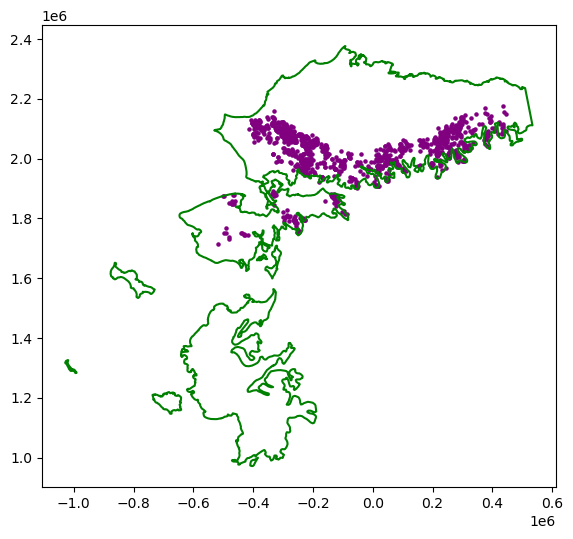

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

# plot all fires across alaska
tundra_shape.boundary.plot(ax=ax, color="green")
epoch1_tundra_lightning.loc[
    (epoch1_tundra_lightning['STRIKETIME'] >= '2010-07-02 00:00:00') & (epoch1_tundra_lightning['STRIKETIME'] < '2010-07-03 00:00:00')
].plot(ax=ax, color="purple", markersize=5)

# plot only fires in the tundra
#tundra_lightning = epoch2_lightning_gdf.clip(tundra_shape)
#tundra_lightning.plot(ax=ax2, color="purple")
#tundra_shape.boundary.plot(ax=ax2, color="green")

#ax1.set_title("All of Alaska Tundra Lightning", fontsize=20)
#ax2.set_title("All of Alaska Tundra Lightning", fontsize=20)
#ax1.set_axis_off()
#ax2.set_axis_off()
plt.show()

## Save the Dataset to Avoid Re-processing

In [56]:
epoch1_lightning_gdf.to_file(
    '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/Alaska_Historical_Lightning/Historical_Lightning_1986_2012_ImpactSystem_AlaskaAlbersNAD83.gpkg',
    driver='GPKG', layer='lightning'
)
epoch2_lightning_gdf.to_file(
    '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/Alaska_Historical_Lightning/Historical_Lightning_2012_2022_TOA_AlaskaAlbersNAD83.gpkg',
    driver='GPKG', layer='lightning'
)

In [57]:
epoch1_tundra_lightning.to_file(
    '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/Alaska_Historical_Lightning/Tundra_Historical_Lightning_1986_2012_ImpactSystem_AlaskaAlbersNAD83.gpkg',
    driver='GPKG', layer='lightning'
)
epoch2_tundra_lightning.to_file(
    '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/Alaska_Historical_Lightning/Tundra_Historical_Lightning_2012_2022_TOA_AlaskaAlbersNAD83.gpkg',
    driver='GPKG', layer='lightning'
)

epoch1_lightning_filename = '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/Alaska_Historical_Lightning/Historical_Lightning_1986_2012_ImpactSystem_AlaskaAlbersNAD83.txt'
epoch2_lightning_filename = '/explore/nobackup/projects/ilab/projects/LobodaTFO/data/Alaska_Historical_Lightning/Historical_Lightning_2012_2022_TOA_AlaskaAlbersNAD83.txt'

In [ ]:
#tundra_lightning.loc[(tundra_lightning['date'] >= '20-09-01') & (tundra_lightning['date'] < '2020-09-15')]

## Perform Additional Visualizations

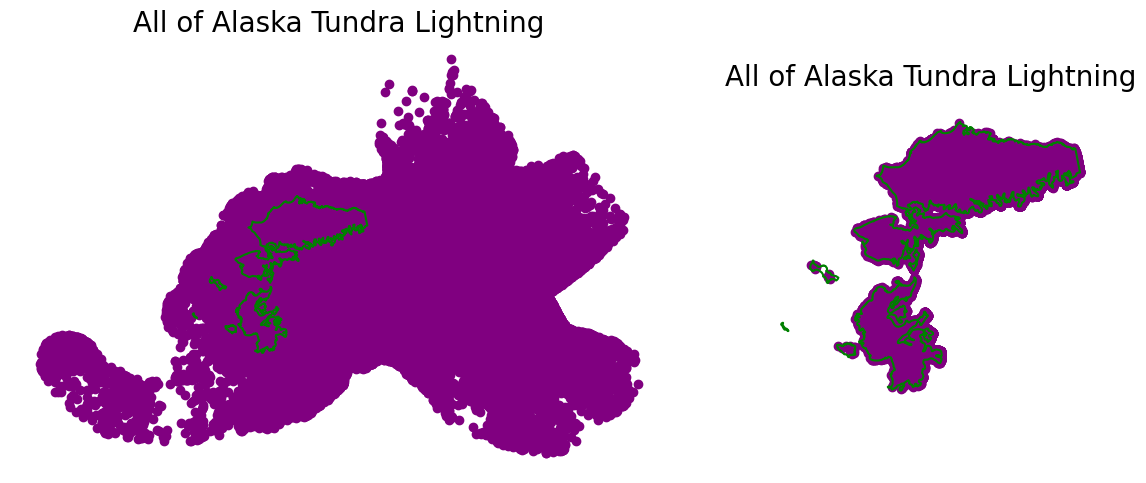

In [21]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1], 'height_ratios': [1]})

# plot all fires across alaska
#tundra_shape.boundary.plot(ax=ax1, color="green")
#epoch2_lightning_gdf.plot(ax=ax1, color="purple")

# plot only fires in the tundra
#tundra_lightning = epoch2_lightning_gdf.clip(tundra_shape)
#tundra_lightning.plot(ax=ax2, color="purple")
#tundra_shape.boundary.plot(ax=ax2, color="green")

#ax1.set_title("All of Alaska Tundra Lightning", fontsize=20)
#ax2.set_title("All of Alaska Tundra Lightning", fontsize=20)
#ax1.set_axis_off()
#ax2.set_axis_off()
#plt.show()